# Analysis of the simulations to SSC 2021

## Install libs

In [36]:
!pip install psycopg2-binary
!pip install pandas
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'c:\users\lubraz\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\lubraz\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\lubraz\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\lubraz\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Connect to DB

In [2]:
import psycopg2

conn = psycopg2.connect("dbname=gama_data user=postgres_user password=gama#123")

# create a cursor
cur = conn.cursor()

# execute a statement
print('PostgreSQL database version:')
cur.execute('SELECT version()')

# display the PostgreSQL database server version
db_version = cur.fetchone()
print(db_version)

PostgreSQL database version:
('PostgreSQL 13.2 (Debian 13.2-1.pgdg100+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 8.3.0-6) 8.3.0, 64-bit',)


In [86]:

import pandas as pd

sql = "SELECT * FROM TB_SELLER_PRODUCTIVITY_CONSOLIDATE"
seller_productivity = pd.read_sql_query(sql, conn)

In [4]:
seller_productivity.head(2)

,id,interaction,seller_name,seller_original_mbti,seller_real_mbti,buyer_target,location_target,is_extroverted,is_sensing,is_thinking,is_judging,number_of_visited_buyers,experiment_name,seed,batch_type
0,1,5,sellers0,"['E','S','F','J']","['E','S','F','J']",buyers93,location[205.7045097665238;492.3424460477548;0.0],1,1,0,1,1,Simulation 0,0.929449,batch-10
1,2,7,sellers2,"['E','S','T','J']","['E','S','T','J']",buyers17,location[300.95666614613907;241.81626886113705...,1,1,1,1,1,Simulation 2,0.453030,batch-10


In [87]:
seller_productivity['seller_mbti'] = seller_productivity['seller_original_mbti'].str.replace('[^A-Z]', '', regex = True)

In [88]:
seller_productivity_aggregated = seller_productivity[['seller_mbti', 
                                                      'number_of_visited_buyers',
                                                      'batch_type', 
                                                      'experiment_name']].groupby(['seller_mbti', 
                                                                                   'batch_type',
                                                                                   'experiment_name']).agg({'number_of_visited_buyers':'max'}).reset_index()

In [91]:
seller_productivity_aggregated = seller_productivity_aggregated.rename(columns={'batch_type':'simulations'})
seller_productivity_aggregated['simulations'][seller_productivity_aggregated.simulations=='batch-10'] = '10'
seller_productivity_aggregated['simulations'][seller_productivity_aggregated.simulations=='batch-100'] = '100'
seller_productivity_aggregated['simulations'][seller_productivity_aggregated.simulations=='batch-1000'] = '1000'

<ipython-input-91-0c57a76e8775>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_productivity_aggregated['simulations'][seller_productivity_aggregated.simulations=='batch-10'] = '10'
<ipython-input-91-0c57a76e8775>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seller_productivity_aggregated['simulations'][seller_productivity_aggregated.simulations=='batch-100'] = '100'
<ipython-input-91-0c57a76e8775>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [92]:
seller_productivity_aggregated

,seller_mbti,simulations,experiment_name,number_of_visited_buyers
0,ENFJ,10,Simulation 0,6
1,ENFJ,10,Simulation 1,2
2,ENFJ,10,Simulation 2,2
3,ENFJ,10,Simulation 3,1
4,ENFJ,10,Simulation 4,5
...,...,...,...,...
17205,ISTP,1000,Simulation 995,12
17206,ISTP,1000,Simulation 996,5
17207,ISTP,1000,Simulation 997,8
17208,ISTP,1000,Simulation 998,8


<Figure size 144x144 with 0 Axes>

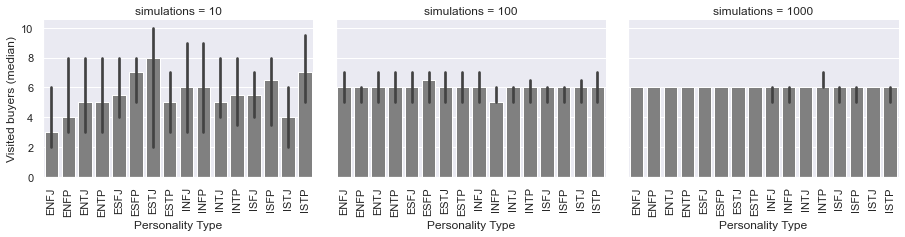

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(2,2))

#sns.barplot(x='seller_mbti', 
#            y='number_of_visited_buyers',
#            data=seller_productivity_aggregated[seller_productivity_aggregated.batch_type=='batch-1000'],
#            estimator=np.median,
#            color='gray'
#           )

chart = sns.catplot(x='seller_mbti', 
                    y='number_of_visited_buyers', 
                    col='simulations', 
                    data=seller_productivity_aggregated, 
                    kind='bar', 
                    color='gray',
                    estimator=np.median,
                    ci=95,
                    height=3.00,
                    aspect=1.40)

chart.set_xticklabels(rotation=90)
chart.set_xlabels('Personality Type')
chart.set_ylabels('Visited buyers (median)')


In [128]:
seller_productivity_aggregated['rank'] = seller_productivity_aggregated.groupby(['experiment_name', 'simulations'])['number_of_visited_buyers'].rank(ascending=False).round()
seller_productivity_aggregated[(seller_productivity_aggregated.experiment_name=='Simulation 0') & (seller_productivity_aggregated.simulations=='10')]

,seller_mbti,simulations,experiment_name,number_of_visited_buyers,rank
0,ENFJ,10,Simulation 0,6,10.0
1076,ENFP,10,Simulation 0,6,10.0
2143,ENTJ,10,Simulation 0,5,12.0
3221,ENTP,10,Simulation 0,8,4.0
4302,ESFJ,10,Simulation 0,3,14.0
5375,ESFP,10,Simulation 0,7,7.0
6455,ESTJ,10,Simulation 0,13,1.0
7530,ESTP,10,Simulation 0,3,14.0
8605,INFJ,10,Simulation 0,2,15.0
9682,INFP,10,Simulation 0,8,4.0


In [132]:
seller_productivity_aggregated.groupby(['seller_mbti'])['rank'].agg(['min', 'max', 'median', 'std']).round(2).reset_index()
seller_productivity_aggregated.groupby(['seller_mbti'])['rank'].agg(['min', 'max', 'median', 'std']).round(2).reset_index().to_csv("Table1")
